In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 一个动图示例

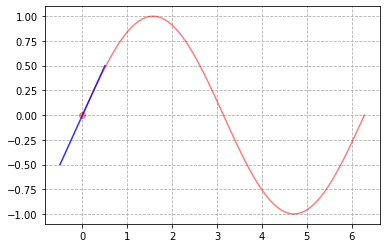

In [2]:
from matplotlib import animation
from IPython.display import HTML

# 初始化画布
fig = plt.figure()
plt.grid(ls='--')

# 绘制一条正弦函数曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
crave_ani = plt.plot(x, y, 'red', alpha=0.5)[0]

# 绘制曲线上的切点
point_ani = plt.plot(x[0], y[0], 'r', alpha=0.4, marker='o')[0]

# 绘制x、y的坐标标识
xtext_ani = plt.text(5, 0.8, '', fontsize=12)
ytext_ani = plt.text(5, 0.7, '', fontsize=12)
ktext_ani = plt.text(5, 0.6, '', fontsize=12)

# 计算切线的函数
def tangent_line(x0, y0, k):
    xs = np.linspace(x0 - 0.5, x0 + 0.5, 100)
    ys = y0 + k * (xs - x0)
    return xs, ys

# 计算斜率的函数
def slope(x0):
    num_min = np.sin(x0 - 0.05)
    num_max = np.sin(x0 + 0.05)
    k = (num_max - num_min) / 0.1
    return k

# 绘制切线
k = slope(x[0])
xs, ys = tangent_line(x[0], y[0], k)
tangent_ani = plt.plot(xs, ys, c='blue', alpha=0.8)[0]

# 更新函数
def updata(num):
    k = slope(x[num])
    xs, ys = tangent_line(x[num], y[num], k)
    tangent_ani.set_data(xs, ys)
    point_ani.set_data(x[num], y[num])
    xtext_ani.set_text('x=%.3f'%x[num])
    ytext_ani.set_text('y=%.3f'%y[num])
    ktext_ani.set_text('k=%.3f'%k)
    return [point_ani, xtext_ani, ytext_ani, tangent_ani, k]

anim = animation.FuncAnimation(fig=fig, func=updata, frames=np.arange(0,100), interval=100)

plt.show()
# ani.save('sin_x.gif')
# HTML(anim.to_jshtml())